In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert5/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert5/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert5/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert5/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert5/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert5/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/audio/new_data_set_fusion/expert5/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/audio/new_data_set_fusion/expert5/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/audio/new_data_set_fusion/expert5/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(207, 1653, 207, 1653, 207, 207)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(1860, 1860)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

1860

In [10]:
df_train

,labels
0,1
1,0
2,1
3,2
4,2
...,...
1855,3
1856,1
1857,5
1858,5


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,0.000002,0.000616,0.999156,0.000070,0.000015,0.000141,1.081491e-14,1.142645e-11,9.940642e-01,5.401968e-03,7.884235e-06,5.259123e-04
1,0.070524,0.924814,0.001640,0.001804,0.001131,0.000087,1.882020e-25,1.000000e+00,1.555737e-12,6.085045e-18,3.091595e-26,6.094200e-25
2,0.000057,0.000164,0.000066,0.001010,0.995511,0.003193,3.220066e-05,2.810607e-05,1.198389e-01,3.198806e-03,8.768932e-01,8.924158e-06
3,0.000493,0.000126,0.000069,0.004140,0.926091,0.069081,7.485163e-12,2.039307e-13,1.402070e-05,1.397863e-07,9.999818e-01,4.093064e-06
4,0.867374,0.088145,0.000096,0.043439,0.000198,0.000748,5.284445e-01,6.786476e-12,7.875812e-09,4.490337e-01,1.050331e-06,2.252069e-02
...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.013694,0.008708,0.000044,0.723786,0.250908,0.002860,8.769180e-12,6.331703e-12,4.600718e-08,1.299225e-08,1.000000e+00,1.901005e-09
203,0.000189,0.001172,0.002108,0.000934,0.873140,0.122457,2.057711e-13,2.634122e-13,9.551393e-06,9.954202e-09,9.999857e-01,4.739117e-06
204,0.000157,0.000339,0.001526,0.003077,0.117318,0.877584,7.142629e-08,1.521400e-12,2.522355e-06,3.346215e-08,9.998832e-01,1.142104e-04
205,0.000283,0.000095,0.000185,0.009486,0.001196,0.988754,3.060748e-07,8.749274e-08,2.425750e-04,8.996981e-07,1.358807e-02,9.861681e-01


In [13]:
len(x_test),len(x_train)

(207, 1860)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,0.003411,0.987883,0.007827,0.000725,0.000091,0.000064,5.079747e-07,9.988770e-01,3.663219e-06,1.093506e-03,2.519679e-05,1.979549e-07
1,0.946476,0.041576,0.000079,0.007025,0.004232,0.000614,9.938034e-01,4.185265e-04,2.935522e-04,2.169219e-04,5.154508e-03,1.130191e-04
2,0.335372,0.644594,0.001657,0.016966,0.000159,0.001252,7.107904e-10,9.994321e-01,4.671387e-04,1.649923e-08,1.006323e-04,2.219154e-10
3,0.000014,0.000685,0.995223,0.000722,0.000039,0.003317,5.995072e-06,1.733456e-04,9.996363e-01,1.810326e-05,1.648107e-04,1.374179e-06
4,0.000002,0.001680,0.998102,0.000089,0.000024,0.000103,9.819279e-08,8.173131e-10,9.999336e-01,9.091209e-06,5.632828e-05,8.305233e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
1855,0.000718,0.000579,0.000208,0.816382,0.020579,0.161535,3.446751e-07,3.551200e-08,8.834924e-05,9.984441e-01,4.786965e-07,1.466756e-03
1856,0.029151,0.967429,0.001374,0.001910,0.000038,0.000099,3.521362e-10,9.990534e-01,9.451332e-04,1.418260e-06,1.085983e-13,2.579746e-09
1857,0.000801,0.000096,0.000103,0.014107,0.003850,0.981043,1.804343e-04,7.189121e-01,1.687092e-04,1.963961e-02,4.104331e-09,2.610992e-01
1858,0.000236,0.000068,0.000225,0.009715,0.000862,0.988894,9.453309e-04,7.813426e-07,3.591382e-03,1.306921e-03,7.713867e-01,2.227689e-01


In [15]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape

(array([1, 0, 1, ..., 5, 5, 5]), (1860,))

# training machine learning

In [16]:
from sklearn.svm import SVC
model = SVC(random_state=2020, kernel='linear')
svm=model.fit(x_train,y_train)
predictions = model.predict(x_test)
#print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [17]:
predictions

array([2, 1, 4, 4, 0, 5, 4, 1, 5, 5, 3, 2, 0, 5, 2, 2, 3, 3, 2, 1, 2, 4,
       1, 5, 4, 2, 3, 0, 5, 3, 0, 3, 2, 3, 3, 4, 4, 5, 1, 4, 0, 0, 4, 4,
       0, 2, 2, 2, 3, 0, 4, 2, 5, 5, 3, 1, 3, 3, 1, 0, 5, 4, 5, 3, 3, 5,
       5, 4, 5, 5, 5, 2, 5, 5, 4, 4, 5, 2, 3, 1, 4, 4, 3, 4, 2, 0, 1, 2,
       0, 0, 5, 5, 2, 2, 4, 1, 5, 0, 1, 3, 2, 2, 2, 1, 4, 1, 3, 1, 4, 1,
       4, 1, 4, 4, 1, 2, 5, 5, 0, 4, 4, 3, 3, 2, 2, 4, 1, 5, 2, 4, 4, 3,
       4, 1, 5, 2, 4, 2, 2, 0, 3, 3, 5, 3, 2, 0, 1, 5, 2, 0, 4, 0, 1, 5,
       2, 2, 5, 1, 4, 5, 4, 3, 5, 2, 2, 1, 1, 4, 5, 1, 3, 4, 4, 0, 4, 3,
       2, 1, 0, 4, 2, 4, 4, 4, 1, 2, 3, 4, 4, 2, 4, 5, 2, 1, 5, 1, 3, 5,
       5, 3, 3, 5, 4, 4, 4, 5, 4])

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.93      0.90      0.92        30
           2       1.00      0.95      0.97        41
           3       0.84      0.90      0.87        29
           4       0.90      0.98      0.94        45
           5       0.95      0.90      0.92        41

    accuracy                           0.93       207
   macro avg       0.94      0.93      0.93       207
weighted avg       0.94      0.93      0.93       207

----accuracy score 93.23671497584542 ----


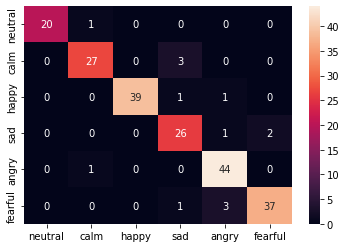

In [18]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','calm', 'happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [19]:
path='/content/drive/My Drive/fusion/fusion_model/SVM/kernel(linear)/expert5'
savedvX = joblib.dump(model, path)

print("MODEL SAVED")

MODEL SAVED
